In [0]:
#file_location = "/FileStore/tables/kddcup_data_10_percent.gz"
#display(dbutils.fs.ls("/FileStore/tables")) 
#dbutils.fs.mv("/FileStore/tables/kddcup_data_10_percent.gz", "dbfs:/kdd/kddcup_data.gz") 

In [0]:
import urllib.request 
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz") 
dbutils.fs.mv("file:/tmp/kddcup_data.gz", "dbfs:/kdd/kddcup_data.gz") 

#File location and type
display(dbutils.fs.ls("dbfs:/kdd")) 

path,name,size,modificationTime
dbfs:/kdd/kddcup_data.gz,kddcup_data.gz,2144903,1699112914000


0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,69,1.00,0.00,1.00,0

In [0]:
RDD = spark.sparkContext.textFile("dbfs:/kdd/kddcup_data.gz")
o=RDD.collect()[:10]
for i in o:
    print(i)

0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,69,1.00,0.00,1.00,0

In [0]:
from pyspark.sql import Row

# Define the column titles as a list of strings
column_titles = ["Duration", "Protocol_type", "Service","Flag","Src_bytes", "Dst_bytes",  "Land", "Wrong_fragment", "Urgent", "Hot", "Num_failed_logins", "Logged_in", "Num_compromised", "Root_shell", "Su_attempted", "Num_root", "Num_file_creations", "Num_shells", "Num_access_files", "Num_outbound_cmds", "Is_hot_login", "Is_guest_login", "Count", "Serror_rate", "Rerror_rate", "Same_srv_rate", "Diff_srv_rate", "Srv_count", "Srv_serror_rate", "Srv_rerror_rate", "Srv_diff_host_rate", "Dst_host_count", "Dst_host_srv_count", "Dst_host_same_srv_rate", "Dst_host_diff_srv_rate", "Dst_host_same_src_port_rate", "Dst_host_srv_diff_host_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "Dst_host_rerror_rate", "Dst_host_srv_rerror_rate","label"]

# Split each row of the RDD by comma and create a Row object with the column titles
RDD = RDD.map(lambda x: Row(**dict(zip(column_titles, x.split(",")))))

print("Total number of features (columns):", len(RDD.first()))

Total number of features (columns): 42


In [0]:
# Create a dataframe from the rdd_rows
df = spark.createDataFrame(RDD)
#df.show(5)

df6 = df[["duration", "protocol_type", "service", "src_bytes","dst_bytes", "flag" , "label"]]
df6=df6.withColumn("duration",df6.duration.cast('int'))
df6=df6.withColumn("src_bytes",df6.src_bytes.cast('int'))
df6=df6.withColumn("dst_bytes",df6.dst_bytes.cast('int'))
df6.show(10)

+--------+-------------+-------+---------+---------+----+-------+
|duration|protocol_type|service|src_bytes|dst_bytes|flag|  label|
+--------+-------------+-------+---------+---------+----+-------+
|       0|          tcp|   http|      181|     5450|  SF|normal.|
|       0|          tcp|   http|      239|      486|  SF|normal.|
|       0|          tcp|   http|      235|     1337|  SF|normal.|
|       0|          tcp|   http|      219|     1337|  SF|normal.|
|       0|          tcp|   http|      217|     2032|  SF|normal.|
|       0|          tcp|   http|      217|     2032|  SF|normal.|
|       0|          tcp|   http|      212|     1940|  SF|normal.|
|       0|          tcp|   http|      159|     4087|  SF|normal.|
|       0|          tcp|   http|      210|      151|  SF|normal.|
|       0|          tcp|   http|      212|      786|  SF|normal.|
+--------+-------------+-------+---------+---------+----+-------+
only showing top 10 rows



+-------------+------+
|protocol_type| count|
+-------------+------+
|          udp| 20354|
|          tcp|190065|
|         icmp|283602|
+-------------+------+

+-----------+-----+
|    service|count|
+-----------+-----+
|     tftp_u|    1|
|    pm_dump|    1|
|      red_i|    1|
|      tim_i|    7|
|        X11|   11|
|      urh_i|   14|
|        IRC|   43|
|     Z39_50|   92|
|    netstat|   95|
|        ctf|   97|
|       name|   98|
|     kshell|   98|
|       exec|   99|
|netbios_dgm|   99|
|   http_443|   99|
|       ldap|  101|
|      pop_2|  101|
|       link|  102|
| netbios_ns|  102|
|    daytime|  103|
+-----------+-----+
only showing top 20 rows



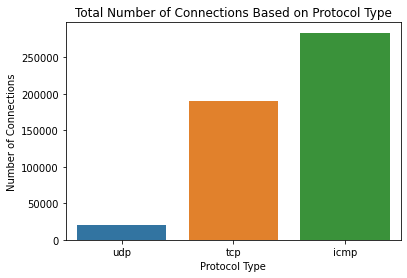

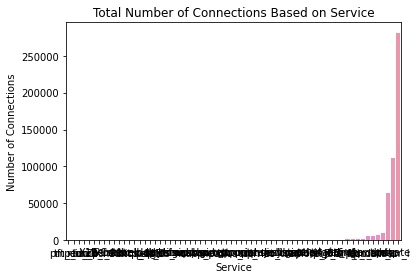

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the dataframe by protocol_type and count the number of connections
protocol_count = df6.groupBy("protocol_type").count()
# Sort the protocol_count by count in ascending order
protocol_count = protocol_count.orderBy("count",ascending=True)
protocol_count.show()
protocol_count_pd = protocol_count.toPandas()

# Group the dataframe by service and count the number of connections
service_count = df6.groupBy("service").count()
# Sort the service_count by count in ascending order
service_count = service_count.orderBy("count",ascending=True)
service_count.show()
service_count_pd = service_count.toPandas()

sns.barplot(x="protocol_type", y="count", data=protocol_count_pd)
plt.xlabel("Protocol Type")
plt.ylabel("Number of Connections")
plt.title("Total Number of Connections Based on Protocol Type")
plt.show()

sns.barplot(x="service", y="count", data=service_count_pd)
plt.xlabel("Service")
plt.ylabel("Number of Connections")
plt.title("Total Number of Connections Based on Service")
plt.show()

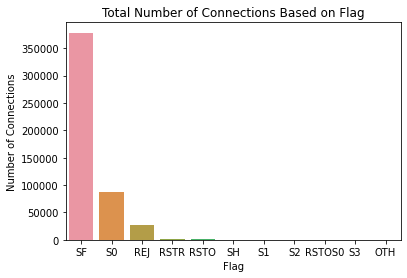

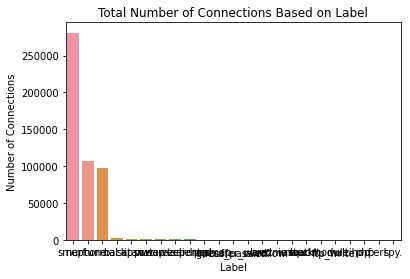

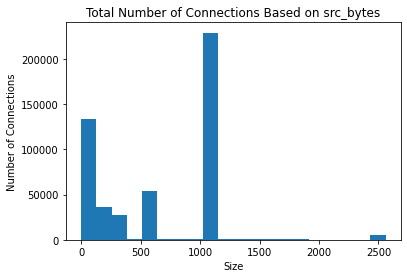

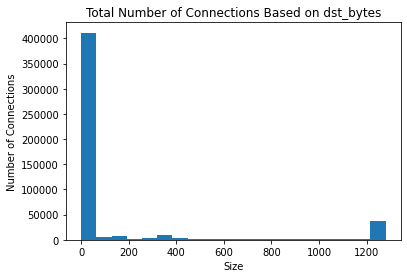

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
count = df6.groupBy("flag").count()
count = count.orderBy("count",ascending=False)
#count.show()
count_pd = count.toPandas()
sns.barplot(x="flag", y="count", data=count_pd)
plt.xlabel("Flag")
plt.ylabel("Number of Connections")
plt.title("Total Number of Connections Based on Flag")
plt.show()

count = df6.groupBy("label").count()
count = count.orderBy("count",ascending=False)
#count.show()
count_pd = count.toPandas()
sns.barplot(x="label", y="count", data=count_pd)
plt.xlabel("Label")
plt.ylabel("Number of Connections")
plt.title("Total Number of Connections Based on Label")
plt.show()

bins=20
src_bin=np.zeros(bins)
x=np.zeros(bins)
for i in range(bins):
    src_bin[i]=df6.filter(df6.src_bytes >= 128*i).count()
    x[i]=128*i+64
    #print(src_bin[i])
for i in range(bins-1):
    src_bin[i]-=src_bin[i+1]
plt.bar(x, src_bin,width=128)
plt.xlabel("Size")
plt.ylabel("Number of Connections")
plt.title("Total Number of Connections Based on src_bytes")
plt.show()

bins=20
dst_bin=np.zeros(bins)
x=np.zeros(bins)
for i in range(bins):
    dst_bin[i]=df6.filter(df6.dst_bytes >= 64*i).count()
    x[i]=64*i+32
    #print(dst_bin[i])
for i in range(bins-1):
    dst_bin[i]-=dst_bin[i+1]
plt.bar(x, dst_bin,width=64)
plt.xlabel("Size")
plt.ylabel("Number of Connections")
plt.title("Total Number of Connections Based on dst_bytes")
plt.show()

In [0]:
from pyspark.sql.functions import when

#convert the data into pure numerical values
df6 = df6.withColumn("new_column", when(df6["protocol_type"] == "icmp", 1).otherwise(0))
df6 = df6.drop("protocol_type")
df6 = df6.withColumnRenamed("new_column", "protocol_type")

df6 = df6.withColumn("new_column", when(df6["service"] == "ecr_i", 1).otherwise(0))
df6 = df6.drop("service")
df6 = df6.withColumnRenamed("new_column", "service")

df6 = df6.withColumn("new_column", when(df6["flag"] == "SF", 1).otherwise(0))
df6 = df6.drop("flag")
df6 = df6.withColumnRenamed("new_column", "flag")

df6 = df6.withColumn("new_column", when(df6["label"] == "normal.", 1).otherwise(0))
df6 = df6.drop("label")
df6 = df6.withColumnRenamed("new_column", "label")

#df6.show(100)
from pyspark.sql.functions import rand
from pyspark.sql.functions import mean, stddev
shuffled_df = df6.withColumn("rand", rand())
# Order the DataFrame by the new "rand" column
shuffled_df = shuffled_df.orderBy("rand")
#shuffled_df.show(10)

#standardize
column_name =["duration", "protocol_type", "service", "src_bytes","dst_bytes", "flag" ]
for i in column_name:
    # Calculate the mean and standard deviation of the column
    mean_val = shuffled_df.select(mean(i)).collect()[0][0]
    stddev_val = shuffled_df.select(stddev(i)).collect()[0][0]

    # Standardize the column
    shuffled_df = shuffled_df.withColumn(i, (shuffled_df[i] - mean_val) / stddev_val)
#shuffled_df.show(10)



from pyspark.ml.classification import LinearSVC
from pyspark.ml.feature import VectorAssembler

feature_columns =["duration", "protocol_type", "service", "src_bytes","dst_bytes", "flag"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
assembled_df = assembler.transform(shuffled_df)
#assembled_df.show(10)

# Split the DataFrame into 80% training and 20% test based on the random column
train = assembled_df.filter("rand <= 0.8")["features","label"]
test = assembled_df.filter("rand > 0.8")["features","label"]

# Show the first few rows of each DataFrame
#print(train.count(),test.count())
#train.show(10)
#test.show(10)

svc = LinearSVC(featuresCol="features", labelCol='label', maxIter=100)
svm_model = svc.fit(train)


predictions = svm_model.transform(train)
#predictions.show(10)
accu = predictions.filter(predictions["label"] == predictions["prediction"]).count()/predictions.count()
print("The train accuracy is", accu)

predictions = svm_model.transform(test)
accu = predictions.filter(predictions["label"] == predictions["prediction"]).count()/predictions.count()
print("The test accuracy is", accu)

The train accuracy is 0.9772972370879301
The test accuracy is 0.9765562659717383
